### Student Details

### Name: Brian Parle

### ID:   18200036

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [14]:
import pandas as pd

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn import preprocessing #needed for scaling attributes to the interval [0,1]
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [15]:
dataset1_df = pd.read_csv("./dataset_1.csv")
dataset1_df.describe()

,Unnamed: 0,0,1,2
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,0.082508,-0.004040,0.668233
std,2887.184355,0.615153,0.575639,0.470871
min,0.000000,-0.999635,-1.400000,0.000000
25%,2500.000000,-0.496767,-0.496319,0.000000
50%,5000.000000,0.208210,-0.006960,1.000000
75%,7500.000000,0.614940,0.491170,1.000000
max,10000.000000,0.999983,0.999918,1.000000


In [42]:
dataset1_df['2'].value_counts()

y = dataset1_df['2']
X = dataset1_df.drop(['Unnamed: 0','2'], axis=1).values

# Highly recommended for SVM to scale data
# scale all predictor values to the range [0, 1]
# note the target attribute is already binary
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

# prepare independent stratified data sets for training and test of the final model
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, shuffle=True, stratify=y, random_state=39)

### Task 4

In [53]:
clf = svm.SVC(kernel='linear', C=1.1) #set probability=True for true randomness
clf.fit(X_train, y_train)

#parameters = {'C':[0.001,0.1,10,100,10e5]}
#parameters = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01], 'SVM__kernel':['linear']}

# Grid Search Cross Validation
#grid = GridSearchCV(clf, param_grid=parameters, cv=5)
#for param in grid.get_params().keys():
#    print(param)
#grid.fit(X_train, y_train)

SVC(C=1.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Sample code to plot SVM margin, 'gutters' and support vectors

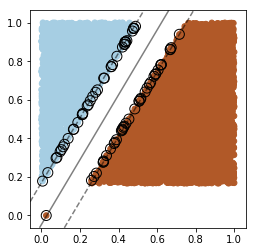

In [64]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


# plot the decision function
ax = plt.gca()
ax.set_aspect(aspect=1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')